In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import fitsio

In [2]:
d = fitsio.read("/Users/beckermr/Downloads/gaia_dr3.fits.gz")

In [73]:
x = d["phot_g_mean_mag"].astype("<f8")
msk = (x <= 18)
h, be = np.histogram(x[msk], bins=np.linspace(3.5, 18, 100))

In [76]:
hx = (be[1:] + be[:-1])/2
msk = h > 0
h = h[msk]
hx = hx[msk]
p = np.polyfit(hx, np.log(h), deg=3)

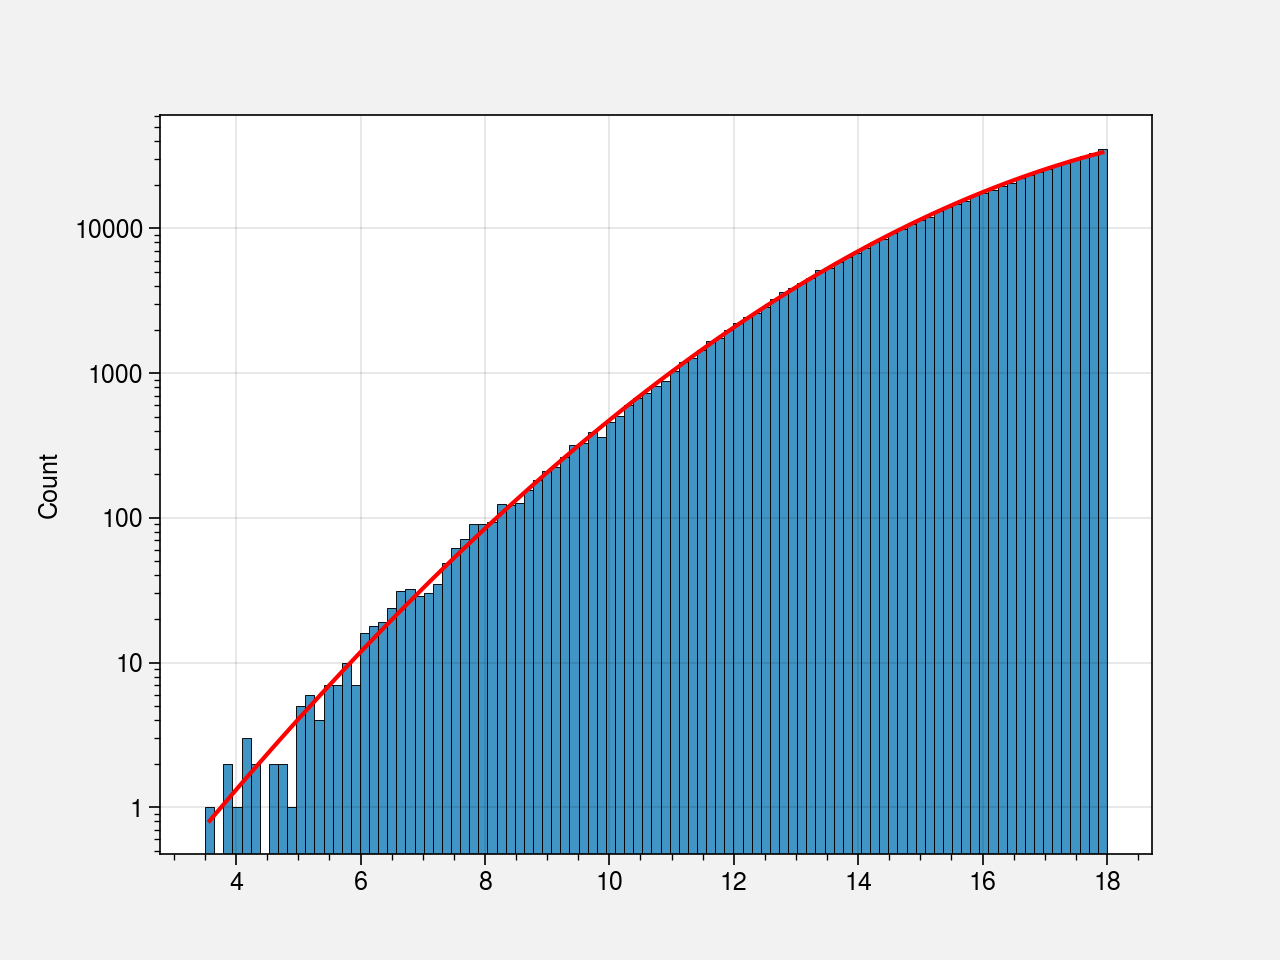

In [78]:
fig, ax = plt.subplots()

x = d["phot_g_mean_mag"].astype("<f8")
msk = (x <= 18)
sns.histplot(x[msk], kde=False, ax=ax, stat='count', bins=be)
ax.plot(hx, np.exp(np.polyval(p, hx)), color='r')
ax.set_yscale('log')


In [80]:
def fit(x):
    return np.exp(np.polyval(p, x))

In [81]:
norm = np.trapz(fit(be), be)

In [104]:
iv = []
for i in range(len(be)):
    if i == 0:
        iv.append(0)
    else:
        _be = np.linspace(be[0], be[i], i*100)
        iv.append(np.trapz(fit(_be)/norm, _be))
iv = np.array(iv)

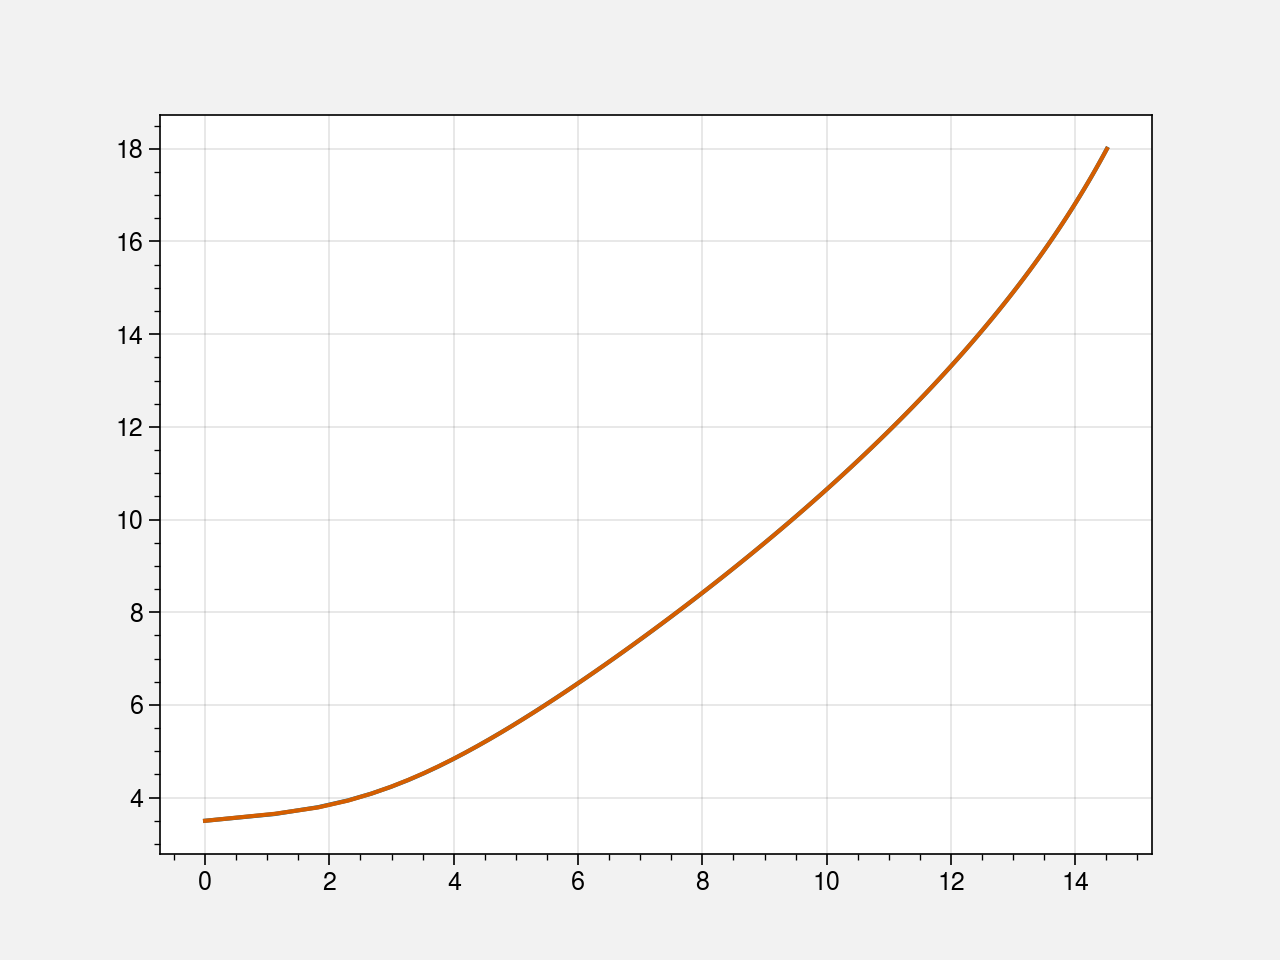

In [118]:
ivs = np.arcsinh(iv/1e-6)

fig, ax = plt.subplots()
ax.plot(ivs, be)

pi = np.polyfit(ivs, be, 8)
ax.plot(ivs, np.polyval(pi, ivs))

In [122]:
print(pi.tolist())
u = np.random.uniform(size=np.sum(msk))
ux = np.polyval(pi, np.arcsinh(u/1e-6))

[3.7145287223147343e-09, 9.522190086985166e-07, -5.692480432853031e-05, 0.001281440711276535, -0.014300143522286599, 0.07904677225341658, -0.11871804979426036, 0.18648572519119352, 3.499524284227276]


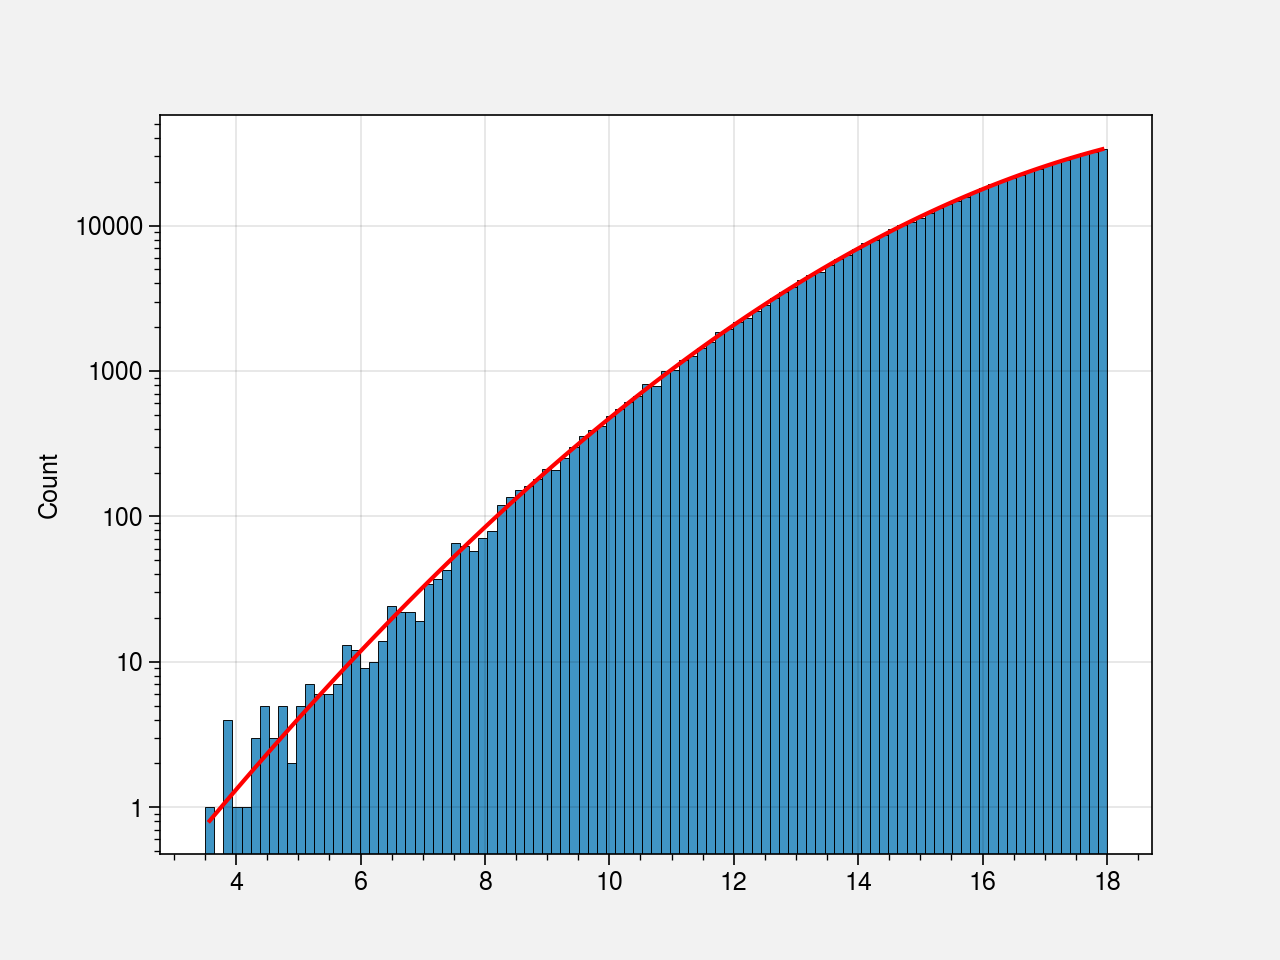

In [120]:
fig, ax = plt.subplots()

sns.histplot(ux, kde=False, ax=ax, stat='count', bins=be)
ax.plot(hx, fit(hx), color='r')
ax.set_yscale('log')

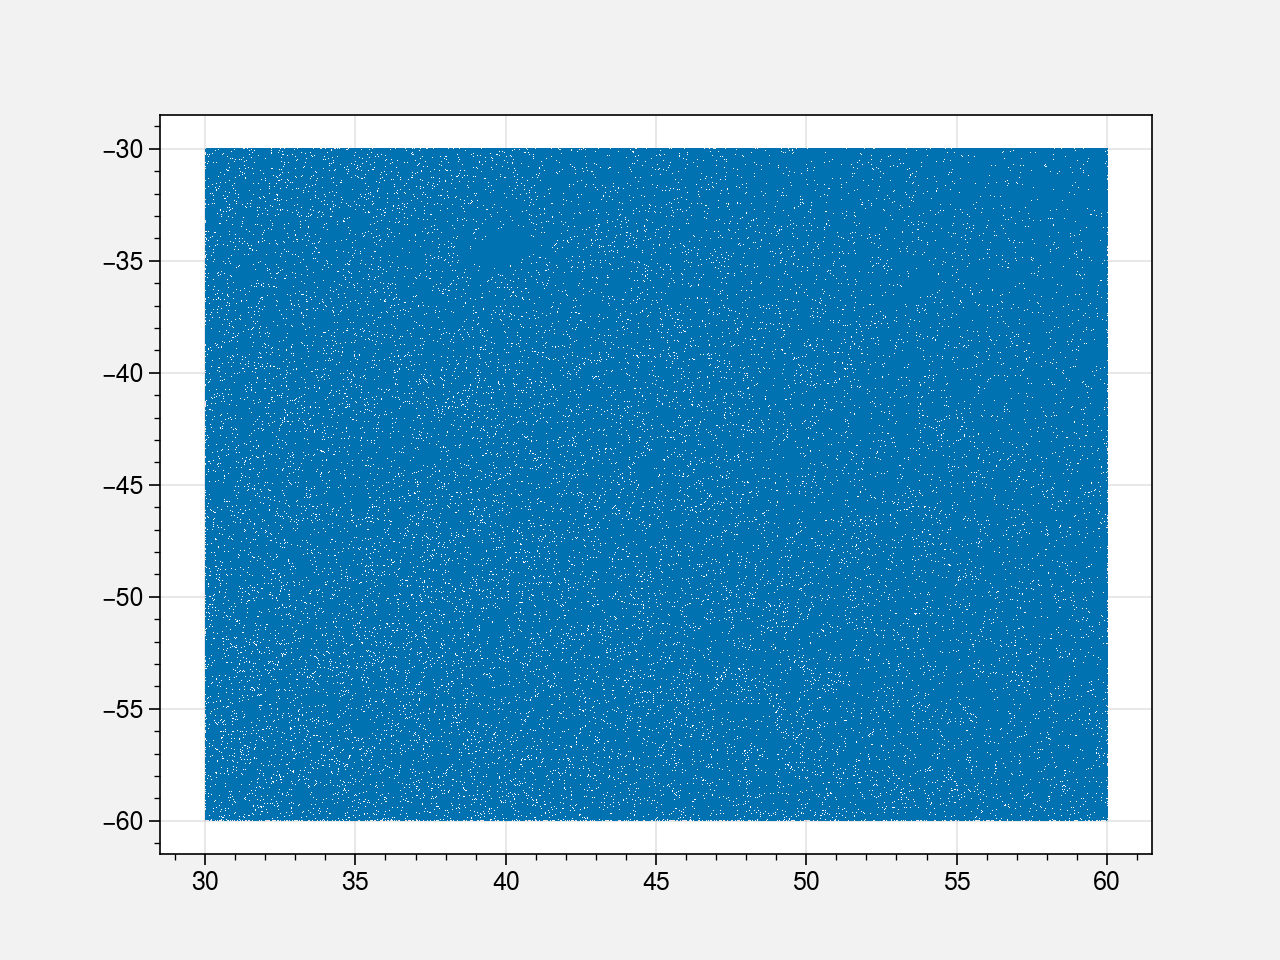

In [124]:
fig, axs = plt.subplots()

axs.plot(d["ra"], d["dec"], ',')


In [130]:
d2r = np.pi/180
d2a = 60

def sph_area(ramin, ramax, decmin, decmax):
    dra = (ramax - ramin)
    ddec = (np.sin(decmax*d2r) - np.sin(decmin*d2r))/d2r
    area = dra * ddec *d2a**2
    return area

assert np.allclose(sph_area(0, 360, -90, 90) / d2a**2 * d2r**2, 4.0 * np.pi)

x = d["phot_g_mean_mag"].astype("<f8")
msk = (x <= 18)

print("gaia dens per arcmin^2:", len(msk)/ sph_area(30, 60, -60, -30))

gaia dens per arcmin^2: 1.0358535145269943
